#Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

##dataset

In [ ]:
df = pd.read_csv("Dataset Buta Warna.csv")
df.head()

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10,Kategori
0,0,0,0,0,0,0,0,0,0,0,Buta Warna Total
1,0,0,0,0,0,0,0,0,0,1,Buta Warna Total
2,0,0,0,0,0,0,0,0,1,0,Buta Warna Total
3,0,0,0,0,0,0,0,0,1,1,Buta Warna Total
4,0,0,0,0,0,0,0,1,0,0,Buta Warna Total


In [ ]:
category_mapping = {'Buta Warna Total': 0, 'Buta Warna Parsial': 1, 'Tidak Buta Warna': 2}
df['Kategori'] = df['Kategori'].map(category_mapping)

In [ ]:
df

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10,Kategori
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1019,1,1,1,1,1,1,1,0,1,1,2
1020,1,1,1,1,1,1,1,1,0,0,2
1021,1,1,1,1,1,1,1,1,0,1,2
1022,1,1,1,1,1,1,1,1,1,0,2


In [ ]:
y_one_hot = to_categorical(df['Kategori'], num_classes=3)

In [ ]:
target_column = "Kategori"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)

In [ ]:
#reverse_mapping = {v: k for k, v in category_mapping.items()}


In [ ]:
#df['Kategori'] = df['Kategori'].map(reverse_mapping)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y_one_hot, test_size=0.25, random_state=0)

In [ ]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (768, 10)
y_train: (768, 3)
X_test: (256, 10)
y_test: (256, 3)


In [ ]:
# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 outputs for 3 classes

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/10
24/24 [==============================] - 5s 25ms/step - loss: 0.8897 - accuracy: 0.6432 - val_loss: 0.7835 - val_accuracy: 0.7266
Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 0.6665 - accuracy: 0.7891 - val_loss: 0.7527 - val_accuracy: 0.7266
Epoch 3/10
24/24 [==============================] - 0s 9ms/step - loss: 0.6191 - accuracy: 0.7891 - val_loss: 0.6911 - val_accuracy: 0.7266
Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 0.5833 - accuracy: 0.7891 - val_loss: 0.6542 - val_accuracy: 0.7266
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 0.5433 - accuracy: 0.7891 - val_loss: 0.5947 - val_accuracy: 0.7266
Epoch 6/10
24/24 [==============================] - 0s 10ms/step - loss: 0.4975 - accuracy: 0.7891 - val_loss: 0.5261 - val_accuracy: 0.7422
Epoch 7/10
24/24 [==============================] - 0s 10ms/step - loss: 0.4430 - accuracy: 0.8008 - val_loss: 0.4584 - val_accuracy: 0.7695
Epoch 8/10
24/24

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

8/8 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.87      1.00      0.93       186
           2       1.00      0.76      0.87        55

    accuracy                           0.89       256
   macro avg       0.62      0.59      0.60       256
weighted avg       0.85      0.89      0.86       256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


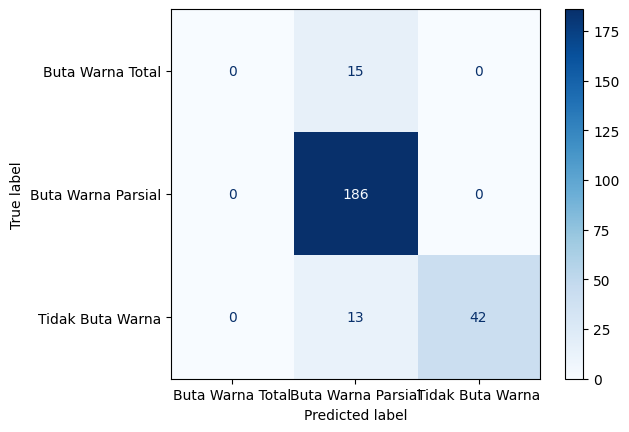

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Buta Warna Total', 'Buta Warna Parsial', 'Tidak Buta Warna'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [ ]:
testdata = pd.read_csv("testdatacolor.csv")
testdata

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,1,1,0
5,0,1,0,0,0,0,0,1,1,0
6,0,1,0,0,0,0,0,1,1,1
7,1,1,1,1,1,1,0,0,0,0
8,1,1,1,1,1,1,0,0,0,1
9,1,1,1,1,1,1,0,0,1,0


In [ ]:
predictions = model.predict(testdata)
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Analyze predictions
print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 0s 210ms/step
Predicted Labels: [0 1 1 1 1 1 1 1 2 1]


In [ ]:
# Save the entire model to a file
model.save("your_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
